# 8 Steps Of Machine Learning
* Data Gathering
* Data pre-processing
* Feature Engineering
* Choosing Model
* Training Model
* Test Model/ Model Evaluation
* Parameter Tuning
* Prediction


In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
# Data Gathering
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn import model_selection
import seaborn as sns
df = pd.read_csv("FuelConsumption.csv")
df.head()
df.describe()

#data Pre-Processing
df.info()
data = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY",
           "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
data.info()

## Feature Engineering Analyssis
corr = data.corr()
# sns.heatmap(corr)
# sns.pairplot(data)
data = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY",
           "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]

## Split data into training and test set
X = data[["ENGINESIZE","FUELCONSUMPTION_COMB"]]
Y = data[["CO2EMISSIONS"]]
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(
    X, Y, test_size=0.2, random_state=1)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB
<cla

In [64]:
## Decision Tree
from sklearn.tree import DecisionTreeRegressor

## Initialize Tree
dtree = DecisionTreeRegressor(max_depth=3, max_features=1,max_leaf_nodes=45)

## Train
dtree.fit(xtrain, ytrain)

## Test Prediction
ypred = dtree.predict(xtest)
(ypred,ytest.values)

## Evaluation
print("MSE: ", mean_squared_error(ypred, ytest))
print("R2 Score: ", r2_score(ypred, ytest))

MSE:  537.6945395704815
R2 Score:  0.8556669825775289


In [ ]:
##
# import graphviz
from sklearn import tree

In [61]:
## Tuning Parameter
from sklearn import model_selection

tree = DecisionTreeRegressor()

X = data[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY",
           "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB"]]
Y = data[["CO2EMISSIONS"]]
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(
    X, Y, test_size=0.2, random_state=1)


gridTree = model_selection.GridSearchCV(
    tree,
    param_grid={
        "max_depth": list(range(3,30)),
        "max_features": [1,2,3,4,5],
        "max_leaf_nodes": list(range(5,50)),
    },
    cv=5, scoring='neg_mean_squared_error',n_jobs=-1, verbose=2
)

## 
gridTree.fit(X, Y)


KeyboardInterrupt: 

In [ ]:
gridTree.best_params_

In [65]:
## Final Model
X = data[["ENGINESIZE"]]
Y = data[["CO2EMISSIONS"]]
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(
    X, Y, test_size=0.2, random_state=1)

final_tree = DecisionTreeRegressor(max_depth=23, max_features=1,max_leaf_nodes=45)

final_tree.fit(xtrain, ytrain)

DecisionTreeRegressor(max_depth=23, max_features=1, max_leaf_nodes=45)

MSE:  734.3536226094369
R2 Score:  0.7820395796459739


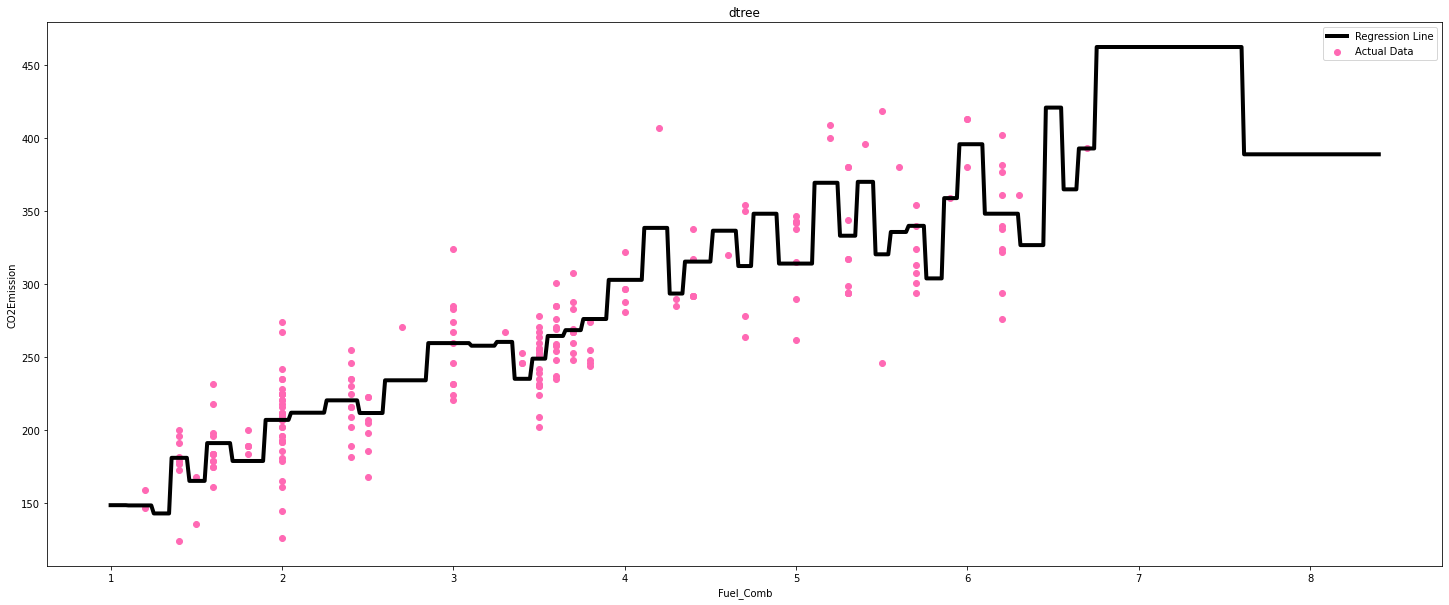

In [66]:
## Tree Analyssis

## Split data into training and test set

fig, axis = plt.subplots(1,1, figsize=(25,10))


## Test Prediction
ypred = final_tree.predict(xtest)
## Evaluation

print("MSE: ", mean_squared_error(ypred, ytest))
print("R2 Score: ", r2_score(ypred, ytest))

## Visualize
## Regression Analyssis
line = np.linspace(1, 8.4, 500).reshape(-1, 1)
axis.scatter(xtest, ytest, label="Actual Data", c="hotpink")
axis.plot(line, final_tree.predict(line),
          label="Regression Line", c="black", linewidth=4)
axis.legend()
axis.set_title("dtree")
axis.set_xlabel("Fuel_Comb")
axis.set_ylabel("CO2Emission")
plt.show()